# How to use PeakOnly in a Jupyter Notebook or general Python script

Install the `ms-peakonly` library in your environment, e.g. with 

    git clone git@github.com:soerendip/ms-peakonly.git
    cd ms-peakonly
    pip install -e .
    
then you should be able to import _PeakOnly_. 

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from ms_peakonly import PeakOnly
from glob import glob
from pathlib import Path as P

## Get a list of files

In [40]:
fns = glob('mzml/*.mzML')[:200]
fns

['mzml/20210827_DBS091_A_MSe_POS_N03.mzML',
 'mzml/20210827_DBS006_A_MSe_POS_N01.mzML',
 'mzml/20210827_DBS034_A_MSe_POS_N03.mzML',
 'mzml/20210827_DBS024_A_MSe_POS_N03.mzML',
 'mzml/20210827_DBS073_D_MSe_POS_N01.mzML',
 'mzml/20210827_DBS016_A_MSe_POS_N01.mzML',
 'mzml/20210827_DBS078_A_MSe_POS_N01.mzML',
 'mzml/20210827_QC_DBS_MSe_POS_N03.mzML',
 'mzml/20210827_DBS027_A_MSe_POS_N02.mzML',
 'mzml/20210827_DBS083_A_MSe_POS_N01.mzML',
 'mzml/20210827_DBS019_A_MSe_POS_N03.mzML',
 'mzml/20210827_DBS007_A_MSe_POS_N02.mzML',
 'mzml/20210827_DBS009_A_MSe_POS_N03.mzML',
 'mzml/20210827_DBS093_A_MSe_POS_N01.mzML',
 'mzml/20210827_DBS004_A_MSe_POS_N03.mzML',
 'mzml/20210827_DBS004_A_MSe_POS_N02.mzML',
 'mzml/20210827_DBS009_A_MSe_POS_N02.mzML',
 'mzml/20210827_DBS007_A_MSe_POS_N03.mzML',
 'mzml/20210827_DBS035_A_MSe_POS_N01.mzML',
 'mzml/20210827_DBS090_A_MSe_POS_N01.mzML',
 'mzml/20210827_DBS019_A_MSe_POS_N02.mzML',
 'mzml/20210827_DBS080_A_MSe_POS_N01.mzML',
 'mzml/20210827_DBS028_A_MSe_POS_N

In [46]:
len(fns)

124

## Create a peakonly instance

In [41]:
PeakOnly?

In [42]:
po = PeakOnly(model_dir='models')

# Process all files with default parameters

In [43]:
table = po.process(fns)

Finding ROIs...


100%|███████████████████████████████████████| 2174/2174 [00:26<00:00, 80.82it/s]


Aligning ROIs...
Finding peaks...
total number of features: 1707
zero filling...


100%|█████████████████████████████████████████| 124/124 [02:17<00:00,  1.11s/it]
/Users/MMbA/Biotwin/ms-peakonly/ms_peakonly/processing_utils/postprocess.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[file] = self.intensities[k]
/Users/MMbA/Biotwin/ms-peakonly/ms_peakonly/processing_utils/postprocess.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[file] = self.intensities[k]
/Users/MMbA/Biotwin/ms-peakonly/ms_peakonly/processing_utils/postprocess.py:54: PerformanceWarning: DataFrame is highly fragmented.  This i

## The output is a `pandas.DataFrame`

In [44]:
table

,mz_mean,rt_min,rt_max,mzml/20210827_DBS091_A_MSe_POS_N03.mzML,mzml/20210827_DBS006_A_MSe_POS_N01.mzML,mzml/20210827_DBS034_A_MSe_POS_N03.mzML,mzml/20210827_DBS024_A_MSe_POS_N03.mzML,mzml/20210827_DBS073_D_MSe_POS_N01.mzML,mzml/20210827_DBS016_A_MSe_POS_N01.mzML,mzml/20210827_DBS078_A_MSe_POS_N01.mzML,...,mzml/20210827_DBS035_A_MSe_POS_N03.mzML,mzml/20210827_DBS007_A_MSe_POS_N01.mzML,mzml/20210827_DBS093_A_MSe_POS_N02.mzML,mzml/20210827_DBS006_A_MSe_POS_N02.mzML,mzml/20210827_DBS073_D_MSe_POS_N02.mzML,mzml/20210827_DBS016_A_MSe_POS_N02.mzML,mzml/20210827_DBS078_A_MSe_POS_N02.mzML,mzml/20210827_DBS015_A_MSe_POS_N03.mzML,mzml/20210827_DBS027_A_MSe_POS_N01.mzML,mzml/20210827_DBS018_A_MSe_POS_N03.mzML
0,60.081872,0.066824,0.069388,462.0,16221.0,6448.0,0.0,0.0,287.0,0.0,...,6718.0,18904.0,248.0,9282.0,0.0,0.0,0.0,415.0,9996.0,0.0
1,71.086783,0.254543,0.257799,1598.0,7567.0,6622.0,10075.0,9013.0,16222.0,4843.0,...,5609.0,8079.0,3115.0,7656.0,5860.0,15100.0,4688.0,9605.0,6367.0,7716.0
2,73.029790,0.209737,0.213022,1636.0,55917.0,8861.0,16281.0,7059.0,23431.0,5658.0,...,8806.0,56591.0,4409.0,20499.0,3741.0,17099.0,4686.0,12889.0,11291.0,18238.0
3,81.034709,0.106529,0.108786,13230.0,5396.0,24778.0,22767.0,26829.0,43154.0,18975.0,...,26002.0,7546.0,15806.0,14505.0,23469.0,39209.0,17584.0,34298.0,124070.0,22614.0
4,81.070742,0.092373,0.095584,6589.0,27115.0,9847.0,13418.0,8904.0,19078.0,11160.0,...,10328.0,26131.0,7300.0,19111.0,7747.0,17010.0,8843.0,11787.0,15905.0,12470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,524.299682,0.138007,0.140634,83738.0,145571.0,190326.0,242929.0,41837.0,256185.0,32935.0,...,176745.0,130315.0,101379.0,128452.0,37782.0,245809.0,31384.0,228788.0,171861.0,240101.0
1703,524.365910,0.140554,0.148814,319841.0,204463.0,662859.0,965417.0,191743.0,746972.0,226400.0,...,571801.0,186942.0,576804.0,186586.0,177475.0,698100.0,227367.0,714695.0,756213.0,820771.0
1704,524.365910,0.140554,0.164446,1296510.0,11104.0,3690673.0,3728641.0,660940.0,3674787.0,482020.0,...,2708306.0,689008.0,2494025.0,1458304.0,878336.0,3516123.0,791646.0,3168389.0,2373079.0,3530607.0
1705,524.365910,0.145622,0.170213,19937003.0,175596.0,31726031.0,39675748.0,9355512.0,40452889.0,6959145.0,...,30410212.0,1265275.0,20923415.0,18233655.0,8680048.0,39470000.0,6821289.0,35389835.0,27835729.0,37945477.0


The unit of retention times that `PeakOpt` returns is _hours_.

In [48]:
table.to_csv("peaks.csv")

<AxesSubplot:>

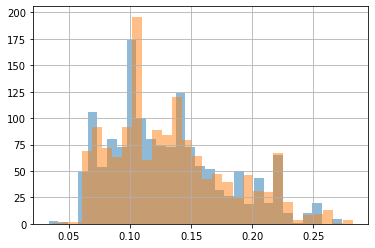

In [38]:
table.rt_min.hist(alpha=.5, bins=30)
table.rt_max.hist(alpha=.5, bins=30)

That corresponds to a 30 minutes long chromatographic run.

# Process with a different program for comparison and visualization

In [39]:
peaklist = po.as_peaklist()
peaklist

AttributeError: 'PeakOnly' object has no attribute 'as_peaklist'

In [ ]:
peaklist.rt_min.hist(alpha=.5, bins=30)
peaklist.rt_max.hist(alpha=.5, bins=30)

## Using the Metabolomics Integrator ([MINT](https://github.com/soerendip/ms-mint))

In [11]:
from ms_mint.notebook import Mint

ModuleNotFoundError: No module named 'ms_mint'

In [ ]:
mint = Mint()
mint.peaklist = po.as_peaklist()

In [ ]:
mint.peaklist['rt_min'] = mint.peaklist['rt_min']
mint.peaklist['rt_max'] = mint.peaklist['rt_max']
mint.peaklist['mz_width'] = 10

In [ ]:
mint.ms_files = fns

In [ ]:
mint.progress_bar

In [ ]:
mint.run()

In [ ]:
mint.plot_peak_shapes(col_wrap=10)

In [ ]:
mint.results

# Merge and compare results

In [45]:
dfpo = po.as_peaklist().melt(id_vars=['peak_label', 'mz_mean', 'mz_width', 'rt_min', 'rt_max', 'rt'], var_name='ms_file', value_name='PeakOnly')
dfpo

AttributeError: 'PeakOnly' object has no attribute 'as_peaklist'

In [ ]:
dfpo['ms_file'] = dfpo.ms_file.apply(lambda x: P(x).name)

In [ ]:
dfpo

In [ ]:
dfmint = mint.results.copy()

## Plot PeakOnly values vs MINT values

In [ ]:
import pandas as pd

In [ ]:
df = pd.merge(dfmint, dfpo[['peak_label', 'ms_file', 'PeakOnly']], on=['peak_label', 'ms_file'])

In [ ]:
import seaborn as sns
g = sns.relplot(data=df, x='peak_area', y='PeakOnly', hue='ms_file')
title('Peak-Area linear scale')
plot([0,1.8e10], [0,1.8e10])
show()

g = sns.relplot(data=df, x='peak_area', y='PeakOnly', hue='ms_file')
g.set(xscale='log', yscale='log')
title('Peak-Area log-scale')
plot([0,1.8e10], [0,1.8e10])
show()

g = sns.relplot(data=df, x='peak_max', y='PeakOnly', hue='ms_file')
g.set(xscale='log', yscale='log')
plot([0,1.8e10], [0,1.8e10])
title('Peak-Max log-scale')
show()

The values that PeakOnly extracts are the areas under the peak or the summed up intensities. However, in some cases the values are different from the MINT values.

## Percentage Error

In [ ]:
df['percentage_error'] = 100 * (df.peak_area - df.PeakOnly) / (df[['peak_area', 'PeakOnly']].max(axis=1)+1)

In [ ]:
df.percentage_error.hist(bins=51, range=(-100, 100))
title('MINT peak_area minus PeakOnly')
ylabel('Count')
xlabel('Percentage Error [%]')

In [ ]:
df = df.sort_values('percentage_error')

In [ ]:
df

The percentage error is centered around zero. The differences are most likely due to differences in the peak-width. For MINT a peak-width of 50ppm of the ion mass was used. 